# Kaggle: Housing Prices 

In this notebook we explore the [housing prices kaggle challenge](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) with Google Colab.  


This is the second notebook in the housing prices kaggle challenge.  Here we explore ML techniques for performing the regression.



To begin, we will clone the repo to have access to the kaggle dataset.

In [1]:
!git clone https://github.com/demarley/figment

fatal: destination path 'figment' already exists and is not an empty directory.


## ML Techniques

Let's explore some ML techniques for doing the regression.

I've only used a few of these techniques (briefly) in my own physics analyses.  As such, I will take some time to work with the scikit-learn API to get a better understanding of what's going on.

_When we did use these techniques, it was only to prove that we could easily outperform our 'basic' analysis techniques. However, once we started testing Boosted Decision Trees and Neural Networks, we never looked back._

In [0]:
# plotting
import matplotlib.style
import matplotlib as mpl
mpl.style.use("default")
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import numpy as np
import pandas as pd

np.random.seed(2019)

In [0]:
df = pd.read_csv("figment/housing-prices/data/train.csv");

### Data Cleaning 

From the previous notebook, we know there are changes we can make to the dataset.  For now we won't do those here.  We will just leave the features that are textual alone for the time being. Let's look at the correlation matrix and choose some of the more correlated features (of the features that have numerical data).

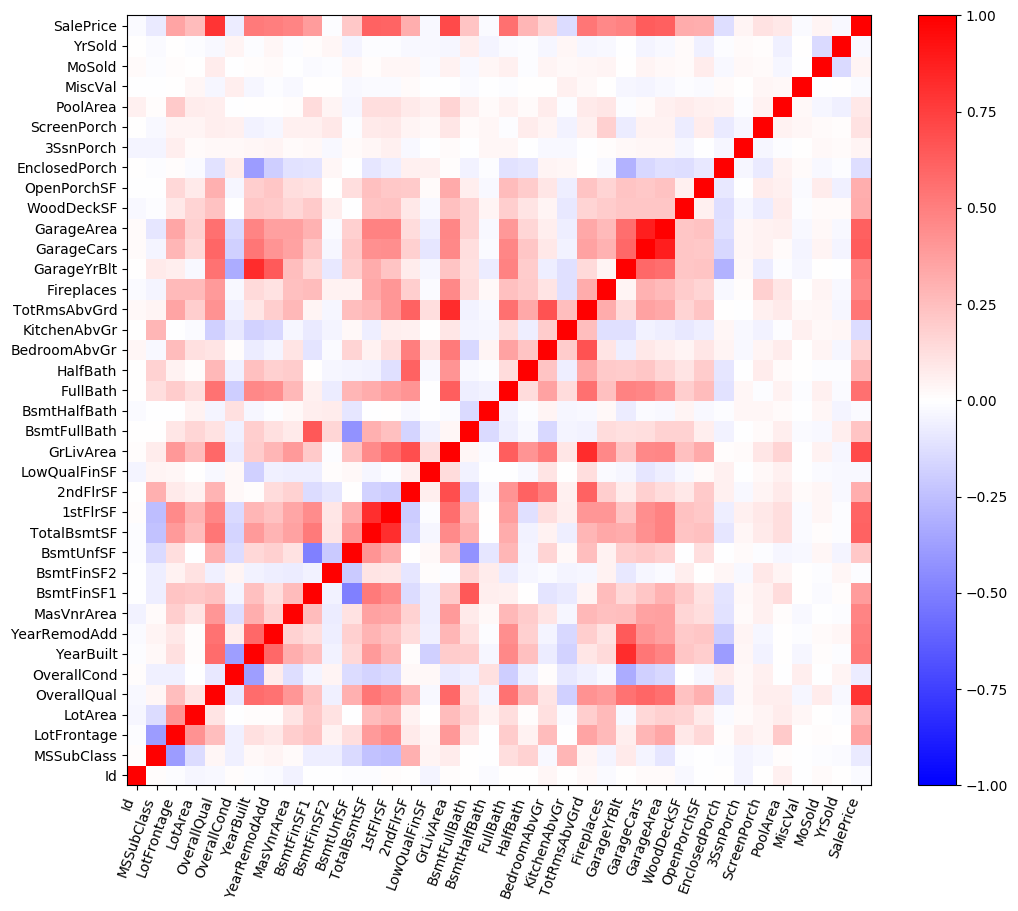

In [6]:
corrmat = df.corr()

fig,ax  = plt.subplots(figsize=(12,10))

opts    = {'cmap':plt.get_cmap("bwr"),'vmin':-1,'vmax':1}
heatmap = plt.pcolor(corrmat, **opts)
cbar    = plt.colorbar(heatmap, ax=ax)

labels = corrmat.columns.values

# shift location of ticks to center of the bins
ax.set_xticks(np.arange(len(labels))+0.5, minor=False);
ax.set_yticks(np.arange(len(labels))+0.5, minor=False);
ax.set_xticklabels(labels, fontsize=10, minor=False, ha='right', rotation=70);
ax.set_yticklabels(labels, fontsize=10, minor=False);

From this correlation matrix, let's choose some of the features most strongly correlated with `SalePrice`.  Then, split the data into a `training` and `validation` sets.

This attempt will use a somewhat random pick of features.  We'll just look at features that have correlations greater than 0.25 with `SalePrice`.

In [7]:
strong_corrs = corrmat[np.abs(corrmat.SalePrice)>0.25].SalePrice
features = list(strong_corrs.index)
_ = features.remove("SalePrice")   # remove the target value from the inputs!
print(strong_corrs.sort_values())

LotArea         0.263843
HalfBath        0.284108
OpenPorchSF     0.315856
2ndFlrSF        0.319334
WoodDeckSF      0.324413
LotFrontage     0.351799
BsmtFinSF1      0.386420
Fireplaces      0.466929
MasVnrArea      0.477493
GarageYrBlt     0.486362
YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64


In [0]:
# split into test and training 
from sklearn.model_selection import train_test_split

df  = df.fillna(-1)
tmp = df.sample(frac=1) # shuffle the dataframe rows
tts = train_test_split(df[features].values,\
                       df['SalePrice'].values, \
                       test_size=0.25)
X_train,X_test,Y_train,Y_test = tts

### Nearest Neighbors

First we'll try predicting the housing price using nearest neighbors regression.

**Description of method**

In [0]:
# Load the modules from scikit-learn
from sklearn import neighbors
from sklearn.metrics import explained_variance_score  # quantifying accuracy of regression

In [0]:
n_neighbors = 5
weights = 'uniform'

knn  = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
fknn = knn.fit(X_train, Y_train)
predictions = fknn.predict(X_test)

Distribution = 0.052 $\pm$ 0.2956
EV Score     = 0.608


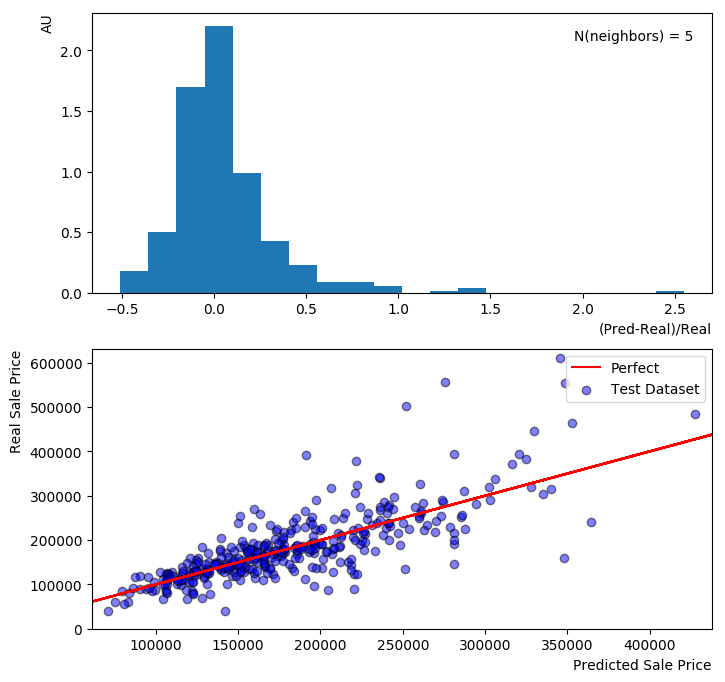

In [13]:
# Prediction: y=m*x+b
X_val = X_test.copy()
values = np.divide((np.asarray(predictions) - Y_test),Y_test)

fig,ax = plt.subplots(2,1,figsize=(8,8))

plt.subplot(2,1,1)
plt.hist(values,bins=20,normed=True)
plt.xlabel("(Pred-Real)/Real",position=(1,0),ha='right')
plt.ylabel("AU",position=(0,1),ha='right')
plt.text(0.97,0.90,"N(neighbors) = {0}".format(n_neighbors),ha='right',transform=ax[0].transAxes)

plt.subplot(2,1,2)
plt.scatter(predictions,Y_test,color='b',edgecolor='k',alpha=0.5,label="Test Dataset");
plt.plot(Y_test,Y_test,color='r',label="Perfect")
plt.xlim(min(predictions)-10000,max(predictions)+10000)
plt.ylim(0,max(Y_test)+20000)
plt.xlabel("Predicted Sale Price",position=(1,0),ha='right')
plt.ylabel("Real Sale Price",position=(0,1),ha='right')
plt.legend()

evs = explained_variance_score(Y_test,predictions)

print(r"Distribution = {0:.3f} $\pm$ {1:.4f}".format(np.mean(values),np.std(values)))
print(r"EV Score     = {0:.3f}".format(evs))

Let's see how changing the `n_neighbors` parameter affects the results.

In [0]:
n_neighbors = 10
knn  = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
fknn = knn.fit(X_train, Y_train)
predictions = fknn.predict(X_test)

Distribution = 0.049 $\pm$ 0.2941
EV Score     = 0.611


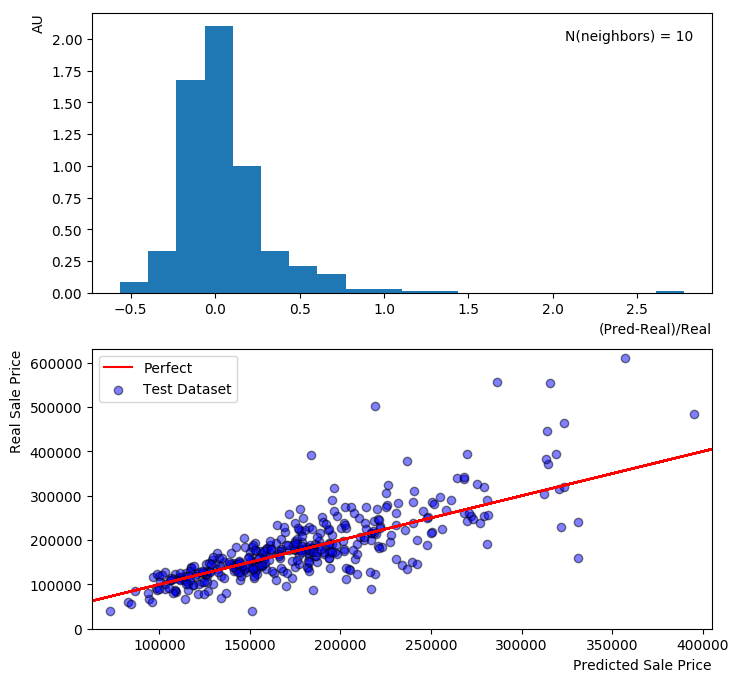

In [15]:
# Prediction
values = np.divide((np.asarray(predictions) - Y_test),Y_test)

fig,ax = plt.subplots(2,1,figsize=(8,8))

plt.subplot(2,1,1)
plt.hist(values,bins=20,normed=True)
plt.xlabel("(Pred-Real)/Real",position=(1,0),ha='right')
plt.ylabel("AU",position=(0,1),ha='right')
plt.text(0.97,0.90,"N(neighbors) = {0}".format(n_neighbors),ha='right',transform=ax[0].transAxes)

plt.subplot(2,1,2)
plt.scatter(predictions,Y_test,color='b',edgecolor='k',alpha=0.5,label="Test Dataset");
plt.plot(Y_test,Y_test,color='r',label="Perfect")
plt.xlim(min(predictions)-10000,max(predictions)+10000)
plt.ylim(0,max(Y_test)+20000)
plt.xlabel("Predicted Sale Price",position=(1,0),ha='right')
plt.ylabel("Real Sale Price",position=(0,1),ha='right')
plt.legend()

evs = explained_variance_score(Y_test,predictions)

print(r"Distribution = {0:.3f} $\pm$ {1:.4f}".format(np.mean(values),np.std(values)))
print(r"EV Score     = {0:.3f}".format(evs))

We can see some improvement from changing `n_neighbors`.  Let's check for a variety of different values now.

In [0]:
train_fit_values = []
fit_values = []
ev_scores  = []

for n_neighbors in range(1,30):
    knn  = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    fknn = knn.fit(X_train, Y_train)

    predictions  = fknn.predict(X_test)
    tpredictions = fknn.predict(X_train)

    offsets = np.divide((np.asarray(predictions) - Y_test),Y_test)
    fit_values.append(offsets)
    
    toffsets = np.divide((np.asarray(tpredictions) - Y_train),Y_train)
    train_fit_values.append(toffsets)
    
    ev_scores.append(explained_variance_score(Y_test,predictions))

 > The number of neighbors with the smallest RMS =  8


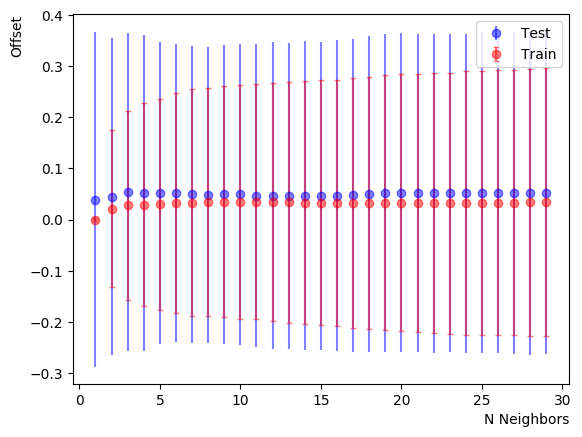

In [22]:
errors = []
# Plot predictions to find optimal n neighbors
for v,values in enumerate(fit_values):
    if v==0:
        test_label = 'Test'
        train_label = 'Train'
    else:
        test_label = None
        train_label = None
    errors.append(np.std(values))
    plt.errorbar(v+1,np.mean(values),color='b',alpha=0.5,yerr=np.std(values),fmt='o',label=test_label)
    plt.errorbar(v+1,np.mean(train_fit_values[v]),color='r',alpha=0.5,yerr=np.std(train_fit_values[v]),fmt='o',capsize=2,label=train_label)

plt.xlabel("N Neighbors",position=(1,0),ha='right')
plt.ylabel("Offset",position=(0,1),ha='right')
plt.legend()

min_errors = 10e6
for i,e in enumerate(errors):
    if e < min_errors:
        min_errors = e
        min_index = i+1
print(" > The number of neighbors with the smallest RMS = ",min_index)

 > The number of neighbors with the largest EVS =  8


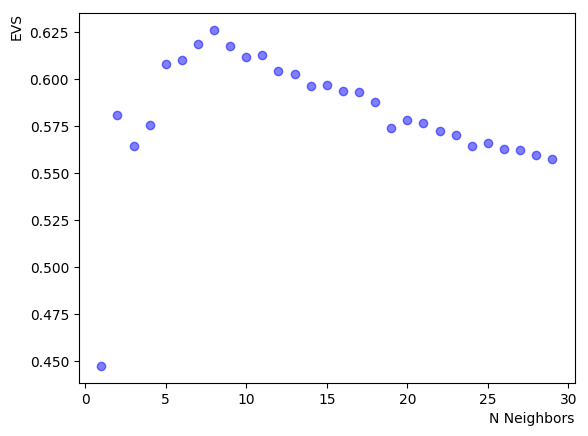

In [18]:
# Plot explained variance scores to find optimal n neighbors
for v,evs in enumerate(ev_scores):
    plt.errorbar(v+1,evs,color='b',alpha=0.5,fmt='o')

plt.xlabel("N Neighbors",position=(1,0),ha='right')
plt.ylabel("EVS",position=(0,1),ha='right')

max_index = 0
max_evs   = -1
for i,e in enumerate(ev_scores):
    if e > max_evs:
        max_evs = e
        max_index = i+1
print(" > The number of neighbors with the largest EVS = ",max_index)

After testing a wide variety of parameters for `n_neighbors`, it seems that the results are mostly consistent above `n_neighbors=2`, with the smallest RMS and largest EVS for the test dataset appearing around `n_neighbors=8`.

As expected, the fit to the training set is 'better' than the testing set, but the overall compatibility between the two (beyond `n_neighbors=1`) is encouraging that the dataset isn't being overfit.

### Support Vector Machines

Next, let's see if we can improve performance using a different approach, namely support vector machines.

**Describe method**

In [0]:
from sklearn import svm

In [20]:
# with scikit-learn it is incredibly easy to get started
clf = svm.SVR()  # support vector regression
clf.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
predictions = clf.predict(X_test)

Let's make similar plots as before to understand the performance:

Distribution = 0.033 $\pm$ 0.4613
EV Score     = 0.000


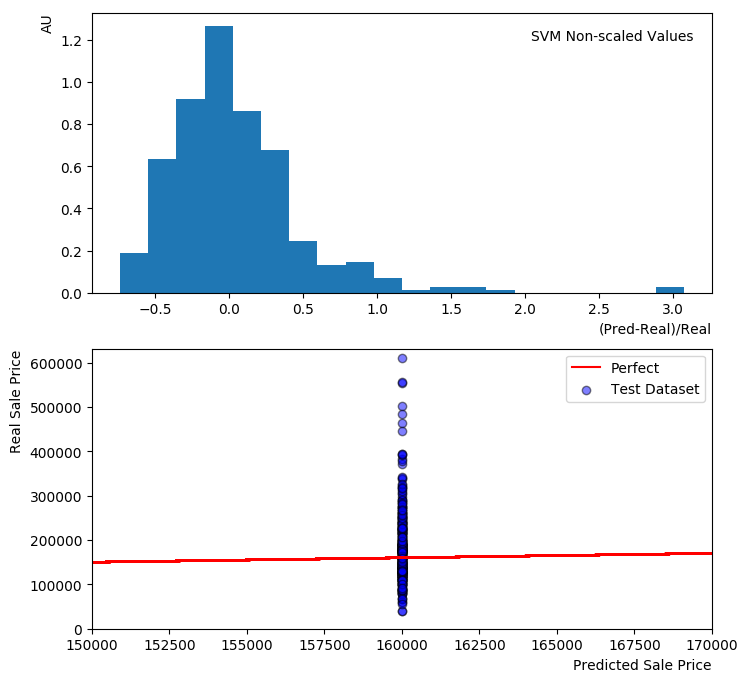

In [22]:
# Prediction
values = np.divide((np.asarray(predictions) - Y_test),Y_test)

fig,ax = plt.subplots(2,1,figsize=(8,8))

plt.subplot(2,1,1)
plt.hist(values,bins=20,normed=True)
plt.xlabel("(Pred-Real)/Real",position=(1,0),ha='right')
plt.ylabel("AU",position=(0,1),ha='right')
plt.text(0.97,0.90,"SVM Non-scaled Values",ha='right',transform=ax[0].transAxes)

plt.subplot(2,1,2)
plt.scatter(predictions,Y_test,color='b',edgecolor='k',alpha=0.5,label="Test Dataset");
plt.plot(Y_test,Y_test,color='r',label="Perfect")
plt.xlim(min(predictions)-10000,max(predictions)+10000)
plt.ylim(0,max(Y_test)+20000)
plt.xlabel("Predicted Sale Price",position=(1,0),ha='right')
plt.ylabel("Real Sale Price",position=(0,1),ha='right')
plt.legend()

evs = explained_variance_score(Y_test,predictions)

print(r"Distribution = {0:.3f} $\pm$ {1:.4f}".format(np.mean(values),np.std(values)))
print(r"EV Score     = {0:.3f}".format(evs))

At first glance, the results are quite jarring! It appears that the same predicted value is produced no matter what! This appears to be due to the scale of the inputs.  

Using SVM, the inputs need to be on the same scale so that there are no discrepancies that remove information due to single, relatively large input values.  
_Also notice that the parameters `epsilon=0.1`, so any changes will be small especially compared to predicted sale prices values (order 10^5).10^_

To test this, let's scale our input data (including the `SalePrice` values!) such that all values are on roughly the same scale.  We can use `scikit-learn` to do this as well :)

In [23]:
# Develop the scaling on the training dataset, and then apply the same shift to the test
from sklearn.preprocessing import StandardScaler

# scale features
scaler = StandardScaler()
scaler.fit(X_train)

# scale target values
scaler_target = StandardScaler()
scaler_target.fit(Y_train.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# Scale values
X_test_scale  = scaler.transform(X_test)
Y_test_scale  = scaler_target.transform([Y_test])
X_train_scale = scaler.transform(X_train)
Y_train_scale = scaler_target.transform([Y_train])

In [25]:
# Do a new fit with the scaled values
clf = svm.SVR()  # support vector regression
clf.fit(X_train_scale,Y_train_scale.T)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
predictions = scaler_target.inverse_transform(clf.predict(X_test_scale))  # convert the data back to the original scale
values      = np.divide((np.asarray(predictions) - Y_test),Y_test)        # offsets to compare predicted and actual value

Distribution = 0.034 $\pm$ 0.1758
EV Score     = 0.843


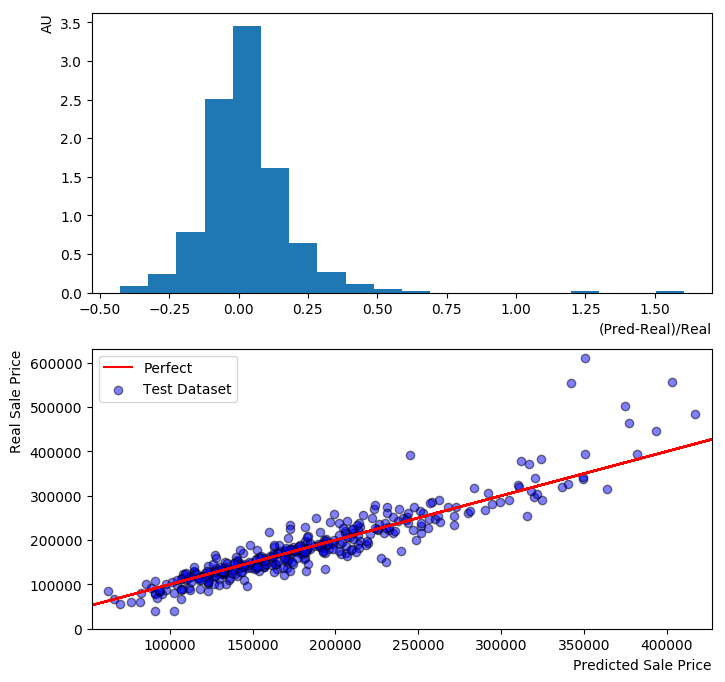

In [27]:
# Prediction
fig,ax = plt.subplots(2,1,figsize=(8,8))

plt.subplot(2,1,1)
plt.hist(values,bins=20,normed=True)
plt.xlabel("(Pred-Real)/Real",position=(1,0),ha='right')
plt.ylabel("AU",position=(0,1),ha='right')

plt.subplot(2,1,2)
plt.scatter(predictions,Y_test,color='b',edgecolor='k',alpha=0.5,label="Test Dataset");
plt.plot(Y_test,Y_test,color='r',label="Perfect")
plt.xlim(min(predictions)-10000,max(predictions)+10000)
plt.ylim(0,max(Y_test)+20000)
plt.xlabel("Predicted Sale Price",position=(1,0),ha='right')
plt.ylabel("Real Sale Price",position=(0,1),ha='right')
plt.legend()

evs = explained_variance_score(Y_test,predictions)

print(r"Distribution = {0:.3f} $\pm$ {1:.4f}".format(np.mean(values),np.std(values)))
print(r"EV Score     = {0:.3f}".format(evs))

As a first pass, the performance looks pretty reasonable (much better than the nearest neighbors approach)!

There are certainly a lot of parameters that we can play with here (in addition to adding/removing features).  For now we can leave those as an exercise for later and move on to testing another approach.

### Boosted Decision Tree with XGBoost
Using `XGBoost`, let's try to do a more sophisticated prediction.

**Describe method.**

In [0]:
import xgboost

In [29]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
predictions = xgb.predict(X_test)
values      = np.divide((np.asarray(predictions) - Y_test),Y_test)        # offsets to compare predicted and actual value

Distribution = 0.022 $\pm$ 0.1622
EV Score     = 0.837


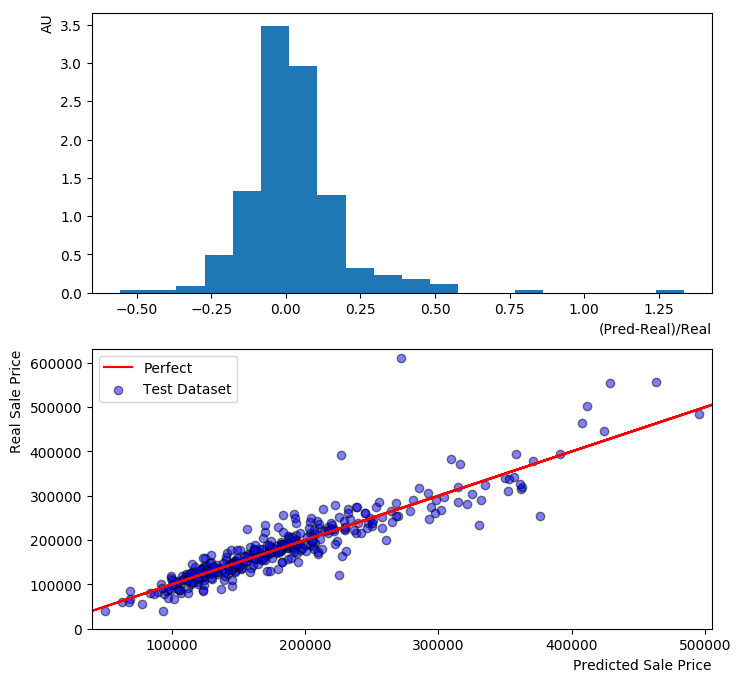

In [31]:
# Prediction
fig,ax = plt.subplots(2,1,figsize=(8,8))

plt.subplot(2,1,1)
plt.hist(values,bins=20,normed=True)
plt.xlabel("(Pred-Real)/Real",position=(1,0),ha='right')
plt.ylabel("AU",position=(0,1),ha='right')

plt.subplot(2,1,2)
plt.scatter(predictions,Y_test,color='b',edgecolor='k',alpha=0.5,label="Test Dataset");
plt.plot(Y_test,Y_test,color='r',label="Perfect")
plt.xlim(min(predictions)-10000,max(predictions)+10000)
plt.ylim(0,max(Y_test)+20000)
plt.xlabel("Predicted Sale Price",position=(1,0),ha='right')
plt.ylabel("Real Sale Price",position=(0,1),ha='right')
plt.legend()

evs = explained_variance_score(Y_test,predictions)

print(r"Distribution = {0:.3f} $\pm$ {1:.4f}".format(np.mean(values),np.std(values)))
print(r"EV Score     = {0:.3f}".format(evs))

Very easily, we can apply `XGBoost` to predict the housing sale price to comparable accuracy as SVMs and better than nearest neighbors!

_Note, we didn't explictly scale our inputs here_

Of course, there are _many_ hyperparameters that we can adjust to prevent overtraining and improve the accuracy.
With time, I'll revisit this to have a better idea as to what each parameter can affect.

## Deep Learning

In the next notebook, I will explore `keras+tensorflow` and some `pytorch` to perform the regression.